# Symbolinen laskenta sympy-kirjastoa käyttäen

Tässä muistikirjassa käydään läpi Pythonin symbolisen laskennan sympy-kirjaston perusulottuvuuksia.

In [1]:
import sympy

In [5]:
z**2

NameError: name 'z' is not defined

In [ ]:
sympy.var('z') # esitellään muuttuja ensin

In [ ]:
z**2 # nyt sillä voidaan laskea

In [ ]:
True^True # ^ on varattu Pythonissa XOR-operaatiolle

In [ ]:
True^False

In [ ]:
z**(1/2) 

Yllä Python laskee suluissa olevan jakolaskun ensin
ja siitä tulee Python-objekti ennen kuin SymPy ehtii muuttaa sen SymPyn olioksi.

Ratkaisu on käyttää sympify() tai Rational-luokkaa.

In [ ]:
z**(sympy.sympify(1)/2)

In [ ]:
z**sympy.Rational(1/2)

Esitellään muuttujia:

In [ ]:
from sympy import symbols
x, y, z = symbols('x y z')
u, v, w = symbols('u v w')
symbols('j0:7')

In [ ]:
g, h = symbols('h g')

In [ ]:
g

In [ ]:
h

Variables Assignment does not Create a Relation Between Expressions

In [ ]:
from sympy import Symbol
a=Symbol('a') # muuttujan a arvo a

In [ ]:
b=a+1 # muuttujan b arvo lauseke a+1

In [ ]:
print(b)

In [ ]:
a=4 # nyt a osoittaa kokonaislukuun 4, ei symboliin a

In [ ]:
print(a)

In [ ]:
print(b) # b osoittaa lausekkeeseen, jonka arvo a+1

In [ ]:
p=Symbol('p')

In [ ]:
sympy.sqrt(p**2) # SymPy ei yksinkertaista tätä, koska vastauksena voi olla 1- tai 1

In [ ]:
p=Symbol('p', positive=True) # nyt ratkaisu on yksikäsitteinen

In [ ]:
sympy.sqrt(p**2)

Yhtäsuuruuden testausta, Eq, ==

In [11]:
from sympy import symbols
x, y = symbols('x y')
sympy.Eq(x,y) # symbolinen yhtäsuuruus ilmaistaan Eq:lla

Eq(x, y)

In [12]:
(x-1)**2 == x**2-2*x+1 # == testaa symbolista samankaltaisuutta

False

In [13]:
(x-1)**2 == (x-1)**2 # == testaa symbolista samankaltaisuutta

True

Semanttisen samankaltaisuuden testaamiseen vähennä lausekkeet toisistaan ja käytä expand, simplify. Muista myös trigsimp, powsimp, trigsimp, logcombine, radsimp, together

In [16]:
from sympy import simplify
simplify((x-1)**2-(x**2-2*x+1))

0

In [19]:
from sympy import sin, cos, simplify, expand, powsimp, trigsimp, logcombine, radsimp, together
sinilauseke1 = sin(2*x)-2*sin(x)*cos(x)


In [20]:
simplify(sinilauseke1)

0

In [23]:
expand(sinilauseke1, trig=True)

0

In [27]:
from sympy.abc import a,b
expand((a-b)**4) # lasketaan (a-b)^4

a**4 - 4*a**3*b + 6*a**2*b**2 - 4*a*b**3 + b**4

In [29]:
expand(2*x+3*y, complex=True) # otetaan kompleksiluvut käyttöön

2*re(x) + 3*re(y) + 2*I*im(x) + 3*I*im(y)

In [30]:
expand(cos(x+y)**2, trig=True) # otetaan trigonometriset funktiot käyttöön

sin(x)**2*sin(y)**2 - 2*sin(x)*sin(y)*cos(x)*cos(y) + cos(x)**2*cos(y)**2

In [31]:
expand(cos(x+2*y), trig=True)  # otetaan trigonometriset funktiot käyttöön

-2*sin(x)*sin(y)*cos(y) + 2*cos(x)*cos(y)**2 - cos(x)

In [35]:
simplify((x**3+y**2*x)/x) # lausekkeen sieventämistä

x**2 + y**2

Harjoittele: laske (x-y)^4 ja sievennä sin(x)/cos(x)

In [44]:
powsimp(x**a*x**b) #lasketaan potensseja

x**(a + b)

In [49]:
together(x**6-17*x**4+8*x**2+5+3*x**5+22*x**3-8*x+6)

x**6 + 3*x**5 - 17*x**4 + 22*x**3 + 8*x**2 - 8*x + 11

In [50]:
together(1/a+1/b)

(a + b)/(a*b)

Kuviot

In [51]:
import matplotlib.pyplot
%matplotlib inline

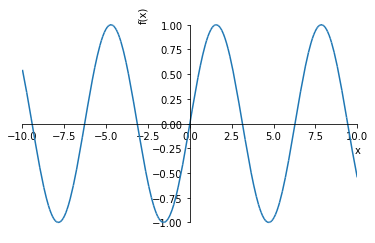

In [52]:
sympy.plot(sympy.sin(x))

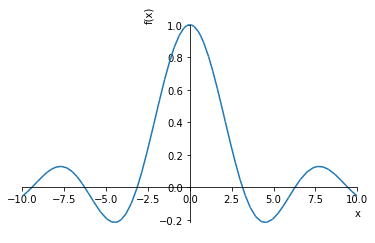

In [53]:
sympy.plot(sympy.sin(x)/x)

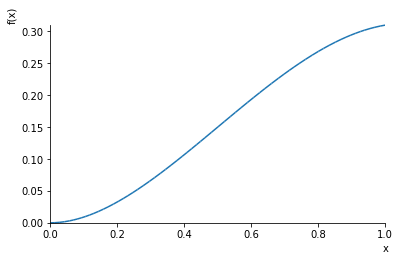

In [59]:
sympy.plot(sympy.exp(-x)*sympy.sin(x**2), (x, 0, 1)) #tässä rajoitettiin aluetta

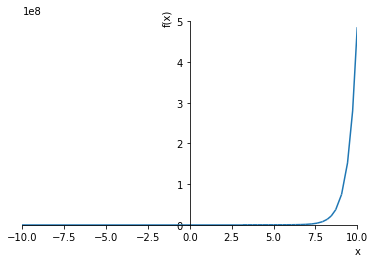

In [56]:
sympy.plot(sympy.exp(2*x))

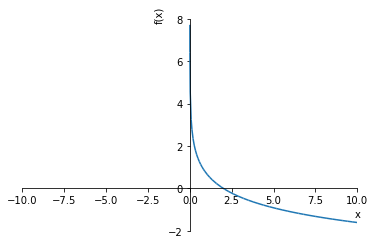

In [58]:
sympy.plot(sympy.log(2/x))

Derivointi, differentiaalit ja integrointi

In [62]:
from sympy import diff
diff(cos(2*x),x)

-2*sin(2*x)